In [57]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from astropy.time import Time
from astropy.coordinates import get_sun, get_moon, SkyCoord
import astropy.units as u
import pandas as pd
import os

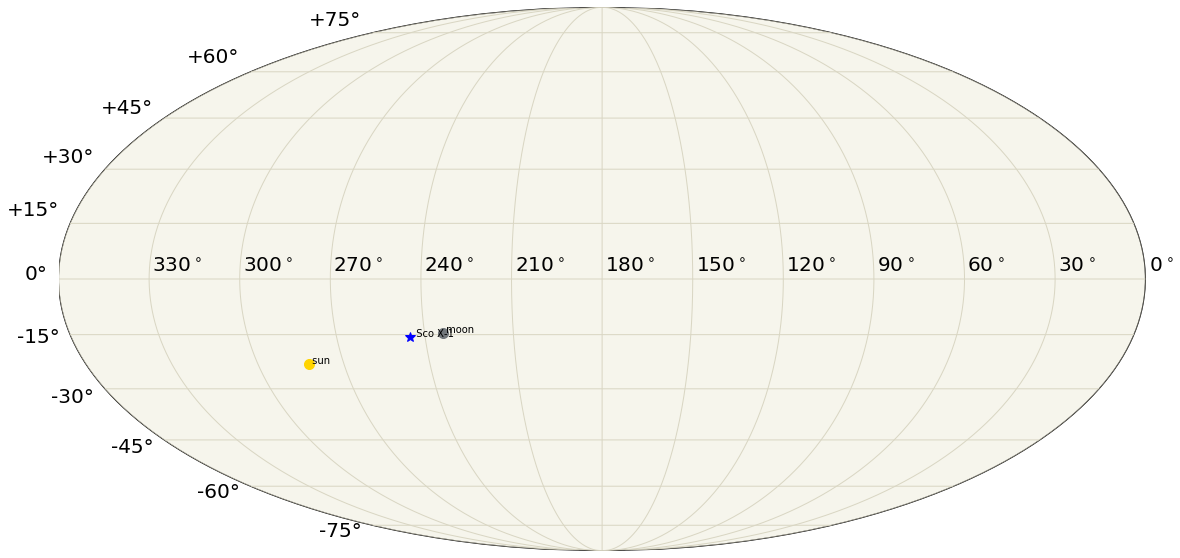

In [46]:
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

time = Time('2019-01-02')
sun_position = get_sun(time)
sun_x,sun_y = map(sun_position.ra.deg, sun_position.dec.deg)
map.plot(sun_x,sun_y ,'o',color='#ffd400',markersize=10)
plt.text(sun_x,sun_y,' sun',fontsize=10)

moon_position = get_moon(time)
moon_x,moon_y = map(moon_position.ra.deg, moon_position.dec.deg)
map.plot(moon_x,moon_y,'o',color = '#72777b',markersize = 10)
plt.text(moon_x,moon_y,' moon',fontsize = 10)

mysourcestr=["16h19m55.07s -15d38m24.8s"]
mysource=SkyCoord(mysourcestr,frame = 'icrs')
x,y=map(mysource.ra.deg,mysource.dec.deg)
labels=['  Sco X-1']
for i in range(x.size):
    map.plot(x[i], y[i], color='b',marker='*',markersize=10)
    plt.text(x[i], y[i], labels[i],fontsize=10)

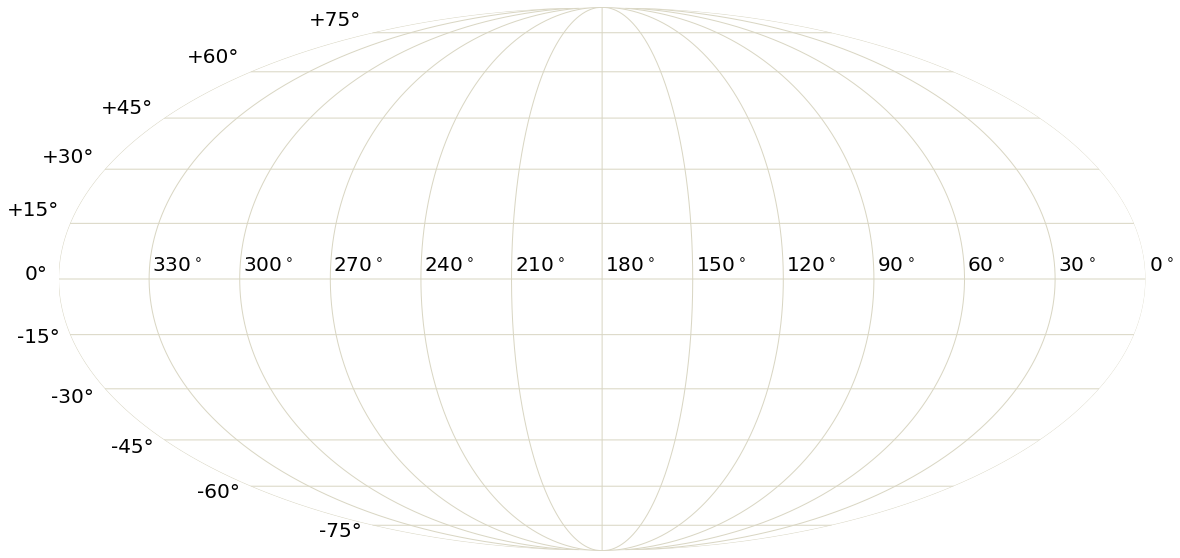

In [103]:
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

df = pd.read_csv('./fermigbrst.txt',delimiter='|',header=0,skipfooter=3,engine='python')
catalog_ra = df[df.columns[4]]
catalog_dec = df[df.columns[5]]

for i in range(len(catalog_ra)):
    try:
        ra = "{}h{}m{}s".format(catalog_ra[i][0],catalog_ra[i][1],catalog_ra[i][2])
        dec = "{}d{}m{}s".format(catalog_dec[i][0],catalog_dec[i][1],catalog_dec[i][2])
        mysource = SkyCoord(ra, dec, frame = 'icrs')
        print(mysource)
        x, y = map(mysource.ra.deg,mysource.dec.deg)
        map.plot(x, y, color='b',marker='*',markersize=10)
    except:
        pass

In [71]:
catalog_ra = df[df.columns[4]].apply(lambda x:x.split()).values
catalog_dec = df[df.columns[5]].apply(lambda x:x.split()).values

In [95]:
ra="{}h{}m{}s".format(catalog_ra[0][0],catalog_ra[0][1],catalog_ra[0][2])

In [96]:
dec="{}d{}m{}s".format(catalog_dec[0][0],catalog_dec[0][1],catalog_dec[0][2])

In [97]:
c = SkyCoord(ra, dec,frame='icrs')

In [98]:
c

<SkyCoord (ICRS): (ra, dec) in deg
    (41.9, 8.5)>

In [106]:
for i in range(len(catalog_ra)):
    ra = "{}h{}m{}s".format(catalog_ra[i][0],catalog_ra[i][1],catalog_ra[i][2])
    dec = "{}d{}m{}s".format(catalog_dec[i][0],catalog_dec[i][1],catalog_dec[i][2])
    mysource = SkyCoord(ra, dec, frame = 'icrs')
    print(mysource)
    x, y = map(mysource.ra.deg,mysource.dec.deg)

ValueError: Syntax error parsing angle '0h2m s'